# 3.9 練習問題

In [1]:
ENV["LINES"] = 10
ENV["COLUMNS"] = 1000

1000

In [43]:
using DataFrames, DataFramesMeta, Gadfly, CSV, Statistics, LinearAlgebra, FreqTables, Clustering

## 3.9.1

In [6]:
gayreshaped_df = CSV.read("../../data/MEASUREMENT/gay-marriage-revisited/data/gayreshaped.csv", DataFrame, missingstring=["NA"])
ccap2012_df = CSV.read("../../data/MEASUREMENT/gay-marriage-revisited/data/ccap2012.csv", DataFrame, missingstring=["NA"])

43998×3 DataFrame
   Row │ Column1  caseid  gaytherm 
       │ Int64    Int64   Int64?   
───────┼───────────────────────────
     1 │       1     328        50
   ⋮   │    ⋮       ⋮        ⋮
                 43997 rows omitted

In [12]:
@chain gayreshaped_df begin
    @rsubset(:study == 1)
    @select(:therm1, :therm2)
    dropmissing
    @combine begin
        :corr = cor(:therm1, :therm2)
    end
end

1×1 DataFrame
 Row │ corr     
     │ Float64  
─────┼──────────
   1 │ 0.995313

In [38]:
for_cor_df = @chain gayreshaped_df begin
    @rsubset(:study == 2)
    @select(:therm1, :therm2, :therm3, :therm4)
end
corr_m = zeros(Float64, 4, 4)
for (i, x) in enumerate(eachcol(for_cor_df))
    for (j, y) in enumerate(eachcol(for_cor_df))
        sx, sy = collect.(skipmissings(x, y))
        corr_m[i, j] = cor(sx, sy)
    end
end
corr_m

4×4 Matrix{Float64}:
 1.0       0.960812  0.949585  0.953874
 0.960812  1.0       0.933023  0.937813
 0.949585  0.933023  1.0       0.931345
 0.953874  0.937813  0.931345  1.0

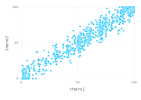

In [39]:
@chain gayreshaped_df begin
    @rsubset(:study == 2, :treatment == "No Contact")
    plot(x = :therm1, y = :therm2, Geom.point)
end

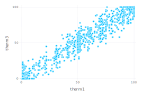

In [40]:
@chain gayreshaped_df begin
    @rsubset(:study == 2, :treatment == "No Contact")
    plot(x = :therm1, y = :therm3, Geom.point)
end

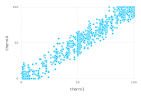

In [41]:
@chain gayreshaped_df begin
    @rsubset(:study == 2, :treatment == "No Contact")
    plot(x = :therm1, y = :therm4, Geom.point)
end

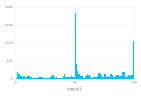

In [42]:
@chain gayreshaped_df begin
    @rsubset(:study == 1)
    plot(x = :therm1, Geom.histogram)
end

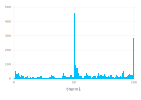

In [43]:
@chain gayreshaped_df begin
    @rsubset(:study == 2)
    plot(x = :therm1, Geom.histogram)
end

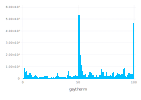

In [45]:
@chain ccap2012_df begin
    plot(x = :gaytherm, Geom.histogram)
end

## 3.9.2

In [46]:
vignettes_df = CSV.read("../../data/MEASUREMENT/political-efficacy/data/vignettes.csv", DataFrame, missingstring=["NA"])

781×6 DataFrame
 Row │ self   alison  jane   moses  china  age   
     │ Int64  Int64   Int64  Int64  Int64  Int64 
─────┼───────────────────────────────────────────
   1 │     1       5      5      2      0     31
  ⋮  │   ⋮      ⋮       ⋮      ⋮      ⋮      ⋮
                                 780 rows omitted

In [58]:
prop(freqtable(vignettes_df.china, vignettes_df.self), margins=1)

2×5 Named Matrix{Float64}
Dim1 ╲ Dim2 │         1          2          3          4          5
────────────┼──────────────────────────────────────────────────────
0           │  0.514056   0.291165   0.110442  0.0240964   0.060241
1           │  0.250883   0.229682   0.265018   0.155477  0.0989399

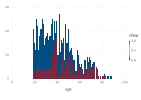

In [59]:
@chain vignettes_df begin
    plot(x = :age, color = :china, Geom.histogram)
end

In [63]:
@chain vignettes_df begin
    @rtransform(:isLower = :self < :moses)
    groupby(:china)
    @combine begin
        :ratio = mean(:isLower)
    end
end

2×2 DataFrame
 Row │ china  ratio    
     │ Int64  Float64  
─────┼─────────────────
   1 │     0  0.248996
   2 │     1  0.561837

In [67]:
rank_df = @chain vignettes_df begin
    @rsubset(:alison >= :jane >= :moses)
    @rtransform begin
        :rank = :self < :moses ? 1 : :moses <= :self <= :jane ? 2 : :jane <= :self <= :alison ? 3 : 4
    end
end
prop(freqtable(rank_df.china, rank_df.rank), margins=1)

2×4 Named Matrix{Float64}
Dim1 ╲ Dim2 │         1          2          3          4
────────────┼───────────────────────────────────────────
0           │  0.117825   0.607251   0.190332  0.0845921
1           │   0.46988   0.385542    0.10241  0.0421687

## 3.9.3

In [11]:
unvoting_df = CSV.read("../../data/MEASUREMENT/un-voting/data/unvoting.csv", DataFrame; missingstring=["NA", ""])

9120×6 DataFrame
  Row │ Year   CountryAbb  CountryName               idealpoint  PctAgreeUS  PctAgreeRUSSIA 
      │ Int64  String7     String                    Float64     Float64?    Float64?       
──────┼─────────────────────────────────────────────────────────────────────────────────────
    1 │  1946  USA         United States of America    1.71369     1.0             0.214286
  ⋮   │   ⋮        ⋮                  ⋮                  ⋮           ⋮             ⋮
                                                                           9119 rows omitted

In [12]:
describe(unvoting_df, :all)

6×13 DataFrame
 Row │ variable        mean         std       min          q25        median     q75       max       nunique  nmissing  first                     last      eltype                  
     │ Symbol          Union…       Union…    Any          Union…     Union…     Union…    Any       Union…   Int64     Any                       Any       Type                    
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Year            1985.32      17.7199   1946         1972.0     1987.0     2001.0    2012                      0  1946                      2012      Int64
  ⋮  │       ⋮              ⋮          ⋮           ⋮           ⋮          ⋮         ⋮         ⋮         ⋮        ⋮                 ⋮                 ⋮                 ⋮
                                                                                                                                                                      5 rows omitted

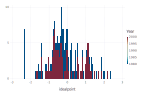

In [16]:
@chain unvoting_df begin
    @rsubset(:Year in [1980, 2000])
    plot(x = :idealpoint, color = :Year, Geom.histogram())
end

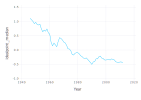

In [26]:
@chain unvoting_df begin
    groupby(:Year)
    @combine(:idealpoint_median = median(:idealpoint))
    plot(x = :Year, y = :idealpoint_median, Geom.line)
end

In [23]:
describe(@rsubset(unvoting_df, :Year == 1980), :all)

6×13 DataFrame
 Row │ variable        mean        std       min          q25        median      q75       max       nunique  nmissing  first                     last      eltype                  
     │ Symbol          Union…      Union…    Any          Union…     Union…      Union…    Any       Union…   Int64     Any                       Any       Type                    
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Year            1980.0      0.0       1980         1980.0     1980.0      1980.0    1980                      0  1980                      1980      Int64
  ⋮  │       ⋮             ⋮          ⋮           ⋮           ⋮          ⋮          ⋮         ⋮         ⋮        ⋮                 ⋮                 ⋮                 ⋮
                                                                                                                                                                      5 rows omitted

In [22]:
describe(@rsubset(unvoting_df, :Year == 2000), :all)

6×13 DataFrame
 Row │ variable        mean        std        min          q25        median    q75       max       nunique  nmissing  first                     last      eltype                  
     │ Symbol          Union…      Union…     Any          Union…     Union…    Union…    Any       Union…   Int64     Any                       Any       Type                    
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Year            2000.0      0.0        2000         2000.0     2000.0    2000.0    2000                      0  2000                      2000      Int64
  ⋮  │       ⋮             ⋮           ⋮           ⋮           ⋮         ⋮         ⋮         ⋮         ⋮        ⋮                 ⋮                 ⋮                 ⋮
                                                                                                                                                                     5 rows omitted

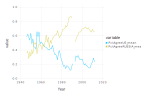

In [29]:
@chain unvoting_df begin
    groupby(:Year)
    @combine begin
        :PctAgreeUS_mean = mean(:PctAgreeUS)
        :PctAgreeRUSSIA_mean = mean(:PctAgreeRUSSIA)
    end
    stack
    plot(x = :Year, y = :value, color = :variable, Geom.line)
end

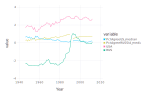

In [35]:
agree_median_df = @chain unvoting_df begin
    groupby(:Year)
    @combine begin
        :PctAgreeUS_median = median(:PctAgreeUS)
        :PctAgreeRUSSIA_median = median(:PctAgreeRUSSIA)
    end
end

usa_rus_df = @chain unvoting_df begin
    @rsubset(:CountryAbb in ["USA", "RUS"])
    @rselect(:Year, :CountryAbb, :idealpoint)
    unstack(:Year, :CountryAbb, :idealpoint)
end

@chain agree_median_df begin
    innerjoin(usa_rus_df, on = :Year)
    stack
    plot(x = :Year, y = :value, color = :variable, Geom.line)
end

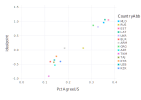

In [38]:
@chain unvoting_df begin
    @rsubset begin
        :Year == 2012
        :CountryAbb in ["EST", "LAT", "BLR", "MLD", "UKR", "ARM", "AZE", "GRG", "KZK", "KYR", "TAJ", "TKM", "UZB", "RUS"]
    end
    plot(x = :PctAgreeUS, y = :idealpoint, color = :CountryAbb, Geom.point)
end

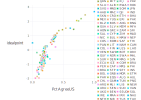

In [40]:
@chain unvoting_df begin
    @rsubset begin
        :Year == 2012
        :CountryAbb ∉ ["EST", "LAT", "BLR", "MLD", "UKR", "ARM", "AZE", "GRG", "KZK", "KYR", "TAJ", "TKM", "UZB", "RUS"]
    end
    plot(x = :PctAgreeUS, y = :idealpoint, color = :CountryAbb, Geom.point)
end

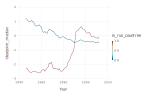

In [42]:
rus_countries = ["EST", "LAT", "BLR", "MLD", "UKR", "ARM", "AZE", "GRG", "KZK", "KYR", "TAJ", "TKM", "UZB", "RUS"]
@chain unvoting_df begin
    @rtransform(:is_rus_countries = :CountryAbb in rus_countries ? 1 : 0)
    groupby([:Year, :is_rus_countries])
    @combine(:idealpoint_median = median(:idealpoint))
    plot(x = :Year, y = :idealpoint_median, color = :is_rus_countries, Geom.line)
end

In [50]:
y1989_df = @chain unvoting_df begin
    @rsubset(:Year == 1989)
    @select(:CountryAbb, :idealpoint, :PctAgreeUS)
    dropmissing
    disallowmissing
end
y2012_df = @chain unvoting_df begin
    @rsubset(:Year == 2012)
    @select(:CountryAbb, :idealpoint, :PctAgreeUS)
    dropmissing
    disallowmissing
end

193×3 DataFrame
 Row │ CountryAbb  idealpoint  PctAgreeUS 
     │ String7     Float64     Float64    
─────┼────────────────────────────────────
   1 │ USA           2.6805      1.0
  ⋮  │     ⋮           ⋮           ⋮
                          192 rows omitted

In [61]:
y1989_res = kmeans(Matrix(y1989_df[:, [:idealpoint, :PctAgreeUS]])', 2)
y2012_res = kmeans(Matrix(y2012_df[:, [:idealpoint, :PctAgreeUS]])', 2)

@transform!(y1989_df, :cluster = assignments(y1989_res))
@transform!(y2012_df, :cluster = assignments(y2012_res))

193×4 DataFrame
 Row │ CountryAbb  idealpoint  PctAgreeUS  cluster 
     │ String7     Float64     Float64     Int64   
─────┼─────────────────────────────────────────────
   1 │ USA           2.6805      1.0             1
  ⋮  │     ⋮           ⋮           ⋮          ⋮
                                   192 rows omitted

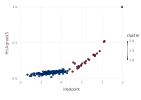

In [62]:
@chain y1989_df begin
    plot(x = :idealpoint, y = :PctAgreeUS, color = :cluster, Geom.point)
end

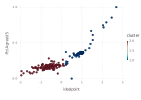

In [63]:
@chain y2012_df begin
    plot(x = :idealpoint, y = :PctAgreeUS, color = :cluster, Geom.point)
end